In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/minion_1016_sqlite.db')
outDir = 'intra'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
sql = '' 
slicer = slicers.HealpixSlicer(nside=64)
metricList = []
metricList.append(metrics.IntraNightGapsMetric())
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, runName='minion_1016'))


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with no constraint.
Found 2447931 visits
Running:  ['minion_1016_Median_Intra-Night_Gap_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
monopole: 0.344782  dipole: lon: 88.8917, lat: 51.2029, amp: 0.0521971
Plotting complete.


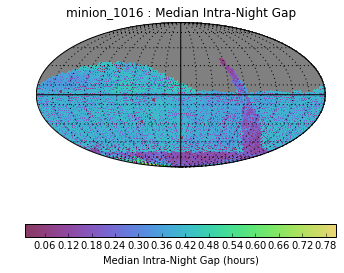

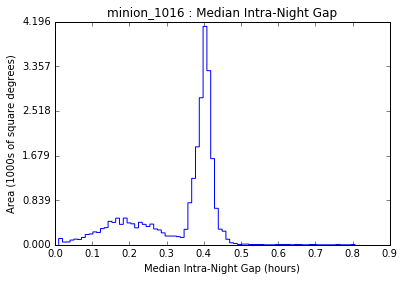

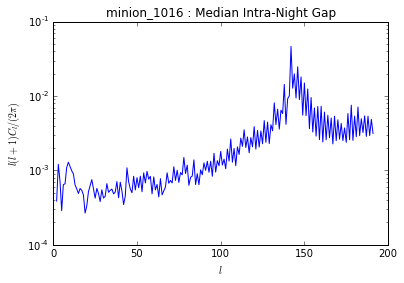

In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)